In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
%matplotlib inline

In [2]:
d=pd.read_csv('top50.csv',encoding='ISO-8859-1')

In [3]:
d.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [4]:
d=d.iloc[:,1:]

In [5]:
d.head()

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [6]:
d.shape

(50, 13)

In [7]:
d.describe()

,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
count,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,120.060000,64.060000,71.38000,-5.660000,14.660000,54.600000,200.960000,22.160000,12.480000,87.500000
std,30.898392,14.231913,11.92988,2.056448,11.118306,22.336024,39.143879,18.995553,11.161596,4.491489
min,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,70.000000
25%,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000,86.000000
50%,104.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,198.000000,15.000000,7.000000,88.000000
75%,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,217.500000,33.750000,15.000000,90.750000
max,190.000000,88.000000,90.00000,-2.000000,58.000000,95.000000,309.000000,75.000000,46.000000,95.000000


In [8]:
d.isnull().sum()

Track.Name          0
Artist.Name         0
Genre               0
Beats.Per.Minute    0
Energy              0
Danceability        0
Loudness..dB..      0
Liveness            0
Valence.            0
Length.             0
Acousticness..      0
Speechiness.        0
Popularity          0
dtype: int64

In [9]:
pd.set_option('precision',3)

In [10]:
print(type(d['Genre']))
gen=d.groupby('Genre').size()
print(gen)
genlist=d['Genre'].values.tolist()
genlist

<class 'pandas.core.series.Series'>
Genre
atl hip hop         1
australian pop      1
big room            1
boy band            1
brostep             2
canadian hip hop    3
canadian pop        2
country rap         2
dance pop           8
dfw rap             2
edm                 3
electropop          2
escape room         1
latin               5
panamanian pop      2
pop                 7
pop house           1
r&b en espanol      1
reggaeton           2
reggaeton flow      2
trap music          1
dtype: int64


['canadian pop',
 'reggaeton flow',
 'dance pop',
 'pop',
 'dfw rap',
 'pop',
 'trap music',
 'pop',
 'country rap',
 'electropop',
 'reggaeton',
 'dance pop',
 'pop',
 'panamanian pop',
 'canadian hip hop',
 'dance pop',
 'latin',
 'dfw rap',
 'canadian hip hop',
 'escape room',
 'pop house',
 'country rap',
 'reggaeton flow',
 'latin',
 'electropop',
 'canadian pop',
 'australian pop',
 'canadian hip hop',
 'latin',
 'latin',
 'edm',
 'dance pop',
 'reggaeton',
 'atl hip hop',
 'dance pop',
 'big room',
 'panamanian pop',
 'pop',
 'boy band',
 'dance pop',
 'edm',
 'dance pop',
 'dance pop',
 'pop',
 'r&b en espanol',
 'brostep',
 'latin',
 'brostep',
 'edm',
 'pop']

In [11]:
print(type(d['Artist.Name']))
c=d.groupby('Artist.Name').size()
print(c)
count=d['Artist.Name'].values.tolist()

<class 'pandas.core.series.Series'>
Artist.Name
Ali Gatie           1
Anuel AA            1
Ariana Grande       2
Bad Bunny           1
Billie Eilish       2
Chris Brown         1
DJ Snake            1
Daddy Yankee        1
Drake               1
Ed Sheeran          4
J Balvin            2
Jhay Cortez         1
Jonas Brothers      1
Katy Perry          1
Khalid              1
Kygo                1
Lady Gaga           1
Lauv                1
Lewis Capaldi       1
Lil Nas X           2
Lil Tecca           1
Lizzo               1
Lunay               1
MEDUZA              1
Maluma              1
Marshmello          2
Martin Garrix       1
Nicky Jam           1
Post Malone         2
ROSALÍA             1
Sam Smith           1
Sech                2
Shawn Mendes        2
Taylor Swift        1
The Chainsmokers    2
Tones and I         1
Y2K                 1
Young Thug          1
dtype: int64


In [12]:
skew=d.skew()

In [13]:
skew

Beats.Per.Minute    0.855
Energy             -0.453
Danceability       -1.380
Loudness..dB..     -0.832
Liveness            2.204
Valence.           -0.046
Length.             0.749
Acousticness..      1.135
Speechiness.        1.378
Popularity         -1.503
dtype: float64

In [20]:
from scipy.stats import skew
numdsk=numd.apply(lambda x:skew(x.dropna()))
numd[numdsk.index]=np.log1p(numd[numdsk.index])

AttributeError: 'float' object has no attribute 'dropna'

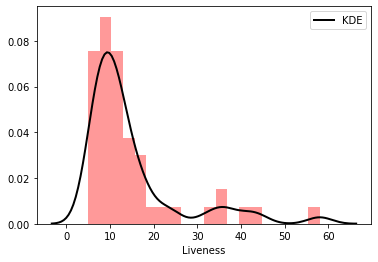

In [117]:
#tr=np.asarray(d['Liveness'].values)
#tr_1=stats.boxcox(tr)[0]
#sns.distplot(d['Liveness'],color='red',bins=20,kde=True,kde_kws={'color':'k','lw':2,'label':'KDE'})

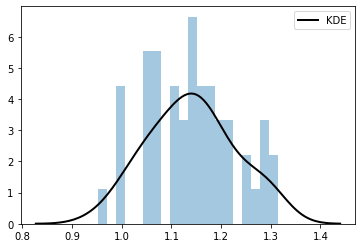

In [118]:
sns.distplot(tr_1,bins=20,kde=True,kde_kws={'color':'k','lw':2,'label':'KDE'})

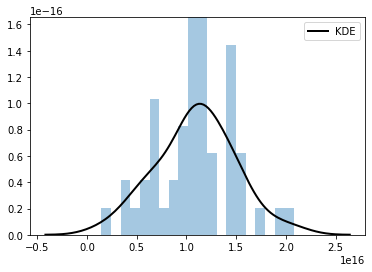

In [119]:
tr1=np.asarray(d['Popularity'].values)
tran=stats.boxcox(tr1)[0]
sns.distplot(tran,bins=20,kde=True,kde_kws={'color':'k','lw':2,'label':'KDE'})

In [120]:
corr=d.corr()
corr

,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
Beats.Per.Minute,1.000,0.044,-9.418e-02,0.017,-0.167,-0.012,-1.393e-01,-0.031,0.557,0.196
Energy,0.044,1.000,1.825e-02,0.671,0.163,0.439,2.247e-01,-0.340,-0.090,-0.080
Danceability,-0.094,0.018,1.000e+00,0.016,-0.150,0.173,-1.853e-04,-0.098,-0.103,-0.071
Loudness..dB..,0.017,0.671,1.625e-02,1.000,0.259,0.238,2.192e-01,-0.138,-0.272,-0.043
Liveness,-0.167,0.163,-1.496e-01,0.259,1.000,0.016,1.318e-01,0.021,-0.125,0.093
Valence.,-0.012,0.439,1.728e-01,0.238,0.016,1.000,-1.778e-02,-0.052,-0.053,-0.318
Length.,-0.139,0.225,-1.853e-04,0.219,0.132,-0.018,1.000e+00,-0.076,0.047,-0.088
Acousticness..,-0.031,-0.340,-9.817e-02,-0.138,0.021,-0.052,-7.629e-02,1.000,0.008,-0.035
Speechiness.,0.557,-0.090,-1.035e-01,-0.272,-0.125,-0.053,4.676e-02,0.008,1.000,0.239
Popularity,0.196,-0.080,-7.141e-02,-0.043,0.093,-0.318,-8.764e-02,-0.035,0.239,1.000


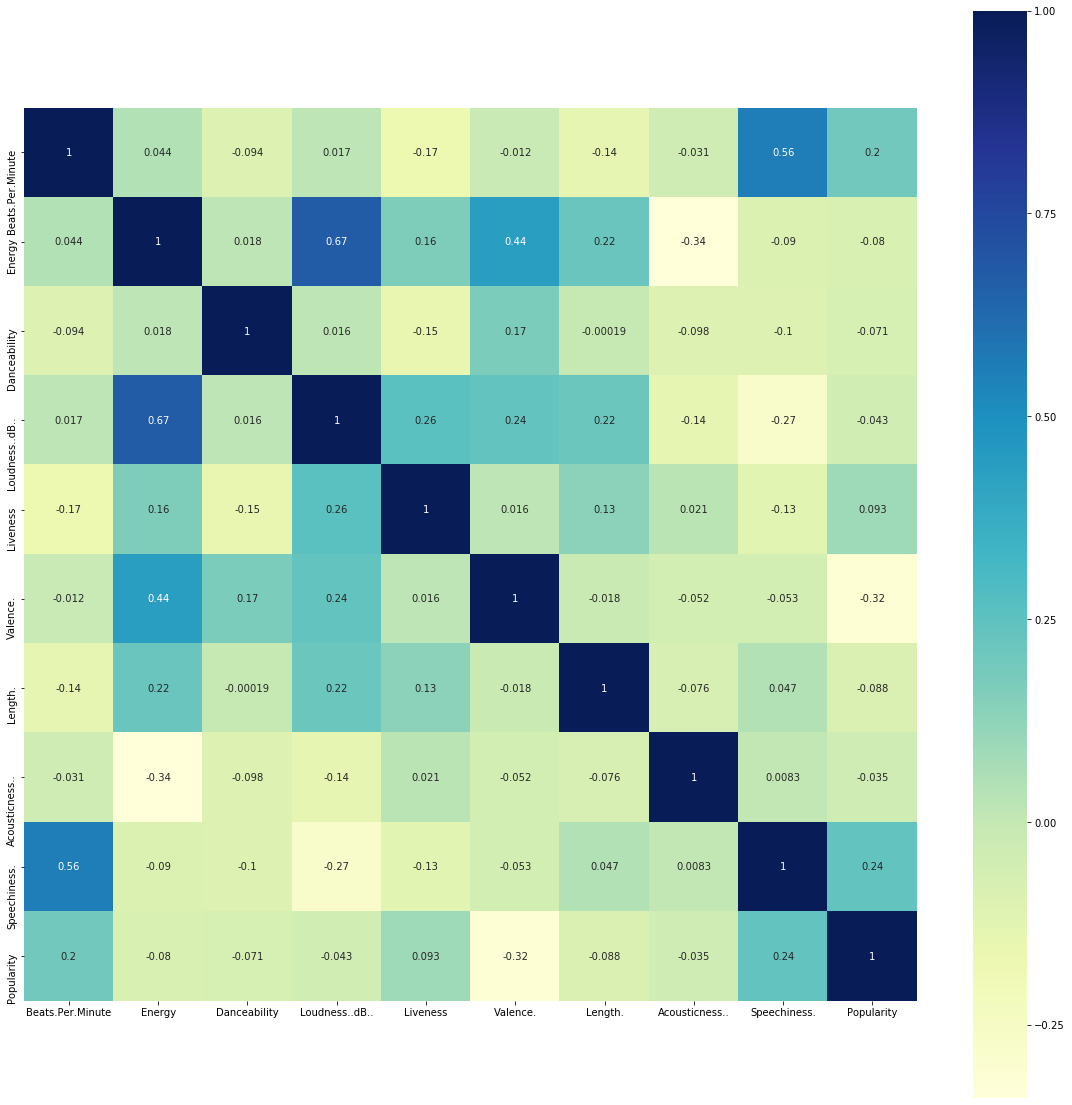

In [121]:
plt.figure(figsize=(20,20))
sns.heatmap(corr,cmap='YlGnBu',annot=True,square=True)


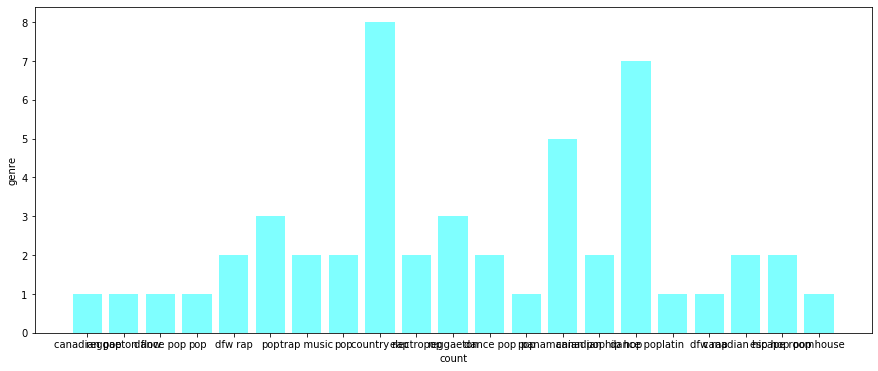

In [122]:
fig=plt.subplots(figsize=(15,6))
ca=np.arange(len(gen))
plt.bar(ca,gen,color='cyan',alpha=.5)
plt.xlabel('count',fontsize=10)
plt.ylabel('genre')
plt.xticks(ca,genlist);

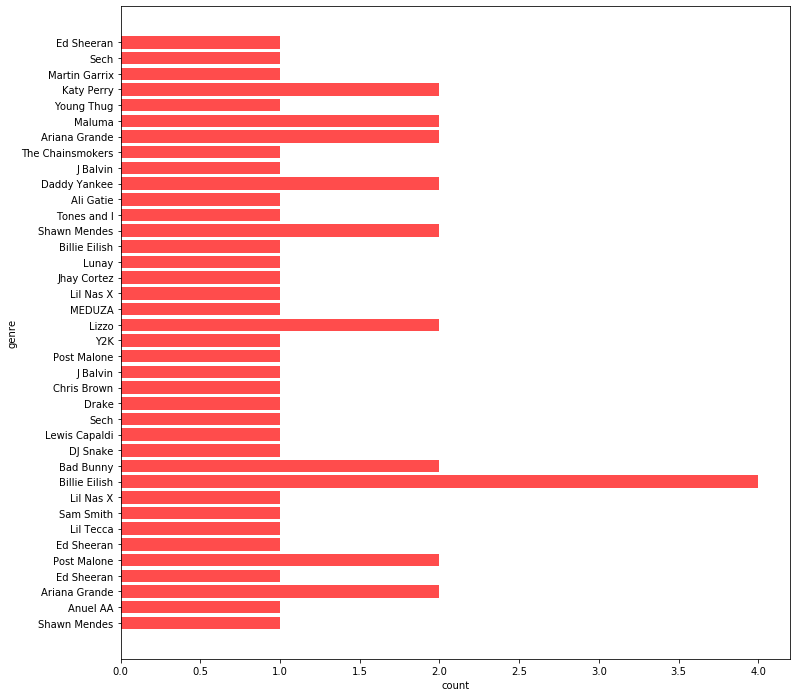

In [123]:
fig=plt.subplots(figsize=(12,12))
cq=np.arange(len(c))
plt.barh(cq,c,color='red',alpha=.7)
plt.xlabel('count',fontsize=10)
plt.ylabel('genre')
plt.yticks(cq,count);

In [124]:
d.columns

Index(['Track.Name', 'Artist.Name', 'Genre', 'Beats.Per.Minute', 'Energy',
       'Danceability', 'Loudness..dB..', 'Liveness', 'Valence.', 'Length.',
       'Acousticness..', 'Speechiness.', 'Popularity'],
      dtype='object')

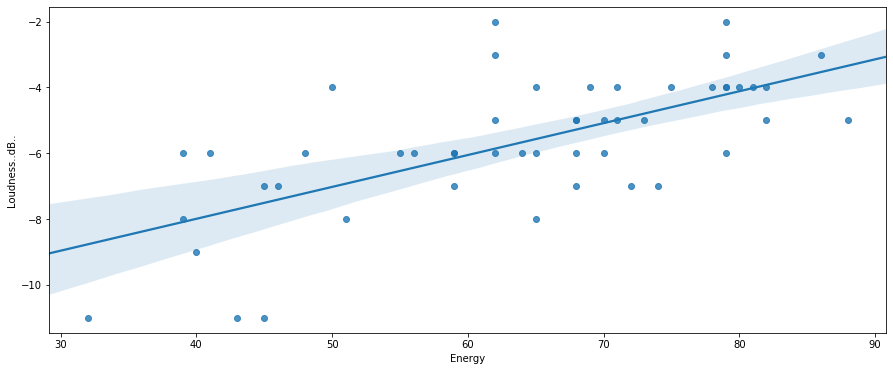

In [131]:
fig=plt.subplots(figsize=(15,6))
sns.regplot(x='Energy',y='Loudness..dB..',data=d)

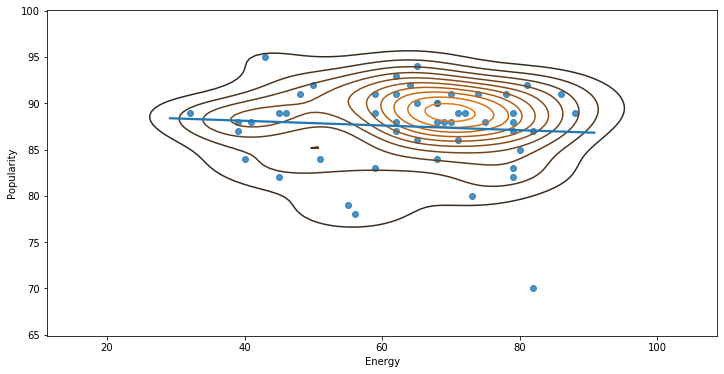

In [132]:
fig=plt.subplots(figsize=(12,6))
sns.regplot(x='Energy',y='Popularity',data=d,ci=None)
sns.kdeplot(d['Energy'],d['Popularity'])

In [133]:
y=d['Popularity']

In [15]:
catd=[col for col in d.columns.values if d[col].dtype=='object']
catd=d[catd]

In [16]:
catd

,Track.Name,Artist.Name,Genre
0,Señorita,Shawn Mendes,canadian pop
1,China,Anuel AA,reggaeton flow
2,boyfriend (with Social House),Ariana Grande,dance pop
3,Beautiful People (feat. Khalid),Ed Sheeran,pop
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap
5,I Don't Care (with Justin Bieber),Ed Sheeran,pop
6,Ransom,Lil Tecca,trap music
7,How Do You Sleep?,Sam Smith,pop
8,Old Town Road - Remix,Lil Nas X,country rap
9,bad guy,Billie Eilish,electropop


In [17]:
numd=d.drop(catd,axis=1)

In [137]:
x=numd.iloc[:,:-1]

In [138]:
x=x.iloc[:,1:]

In [139]:
x

,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.
0,55,76,-6,8,75,191,4,3
1,81,79,-4,8,61,302,8,9
2,80,40,-4,16,70,186,12,46
3,65,64,-8,8,55,198,12,19
4,65,58,-4,11,18,175,45,7
5,68,80,-5,9,84,220,9,4
6,64,75,-6,7,23,131,2,29
7,68,48,-5,8,35,202,15,9
8,62,88,-6,11,64,157,5,10
9,43,70,-11,10,56,194,33,38


In [140]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30)

In [142]:
reg=LinearRegression()
reg.fit(x_train,y_train)
print(reg.intercept_)
print(reg.coef_)

97.50715386038968
[-0.03296312  0.01990665  0.47282744 -0.01978504 -0.07755977 -0.02050336
 -0.00307815  0.13777954]


In [144]:
y_pred=reg.predict(x_test)
df_output=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
print(df_output)

    Actual  Predicted
41      90     85.341
37      87     83.430
34      89     86.293
48      88     84.721
3       86     86.953
7       90     88.036
32      89     89.085
35      89     87.788
23      91     82.548
46      88     84.725
39      78     85.780
16      90     89.848
45      88     88.207
5       84     83.814
11      86     88.749


In [148]:
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 2.7486562960219603
MSE: 13.94126763497933
RMSE: 3.7338006956691365


Text(0.5, 1.0, 'error analysis')

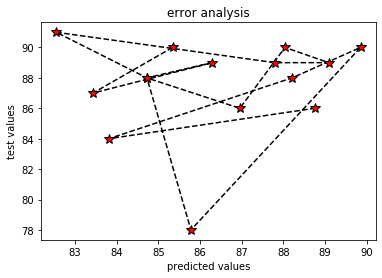

In [153]:
plt.plot(y_pred,y_test,color='k',linestyle='dashed',marker='*',markerfacecolor='red',markersize=10)
plt.xlabel('predicted values')
plt.ylabel('test values')
plt.title('error analysis')

In [155]:
d.columns

Index(['Track.Name', 'Artist.Name', 'Genre', 'Beats.Per.Minute', 'Energy',
       'Danceability', 'Loudness..dB..', 'Liveness', 'Valence.', 'Length.',
       'Acousticness..', 'Speechiness.', 'Popularity'],
      dtype='object')

In [180]:
x=d.loc[:,['Artist.Name']].values
y=d.loc[:,'Genre'].values

In [181]:
x.shape
encoder=LabelEncoder()
X=encoder.fit_transform(x)
X=pd.DataFrame(X)
X

c:\users\lenovo\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,0
0,32
1,1
2,2
3,9
4,28
5,9
6,20
7,30
8,19
9,4


In [182]:
Y=encoder.fit_transform(y)
Y=pd.DataFrame(Y)
Y

,0
0,6
1,19
2,8
3,15
4,9
5,15
6,20
7,15
8,7
9,11


In [187]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.30,random_state=1)


In [191]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_train)
x_train=sc.transform(x_train)
x_test=sc.transform(x_test)
y_test=sc.transform(y_test)

In [192]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=17)
KNN.fit(x_train,y_train)
pred=KNN.predict(x_test)

c:\users\lenovo\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [194]:
error=[]
for i in range(1,30):
    KNN=KNeighborsClassifier(n_neighbors=i)
    KNN.fit(x_train,y_train)
    pred_i=KNN.predict(x_test)
    error.append(np.mean(pred_i!=y_test))

c:\users\lenovo\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
c:\users\lenovo\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
c:\users\lenovo\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
c:\users\lenovo\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: DataConv

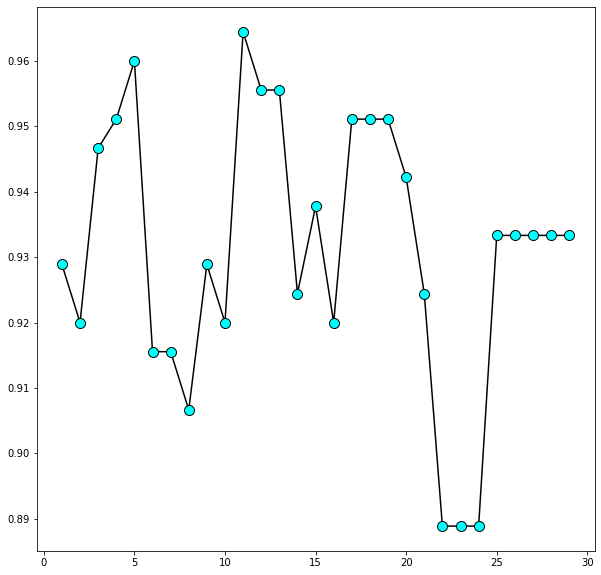

In [195]:
plt.figure(figsize=(10,10))
plt.plot(range(1,30),error,color='k',marker='o',markerfacecolor='cyan',markersize=10)